In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-dataset-csv/Fraud Detection Dataset.csv


# **Import**
----------

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import**
-------------

In [3]:
df = pd.read_csv('/kaggle/input/fraud-detection-dataset-csv/Fraud Detection Dataset.csv')

### **Data Description**

-----------------------

* **Fraudulent transactions are a growing challenge for fintech companies. This dataset captures 51,000+ transactions, each labeled as fraudulent or legitimate, based on real-world patterns.**  

* **It includes transaction details, user behavior, payment methods, and device usage, making it ideal for:**   
✅ **Fraud detection modeling (classification).**   
✅ **Feature engineering & anomaly detection.**   
✅ **Exploratory data analysis (EDA) & pattern recognition.**   

## **Summary**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,51000.0,3005.110176,1153.121107,1000.00,2007.0000,2996.0,4006.00,4999.0
Transaction_Amount,48480.0,2996.249784,5043.932555,5.03,1270.5525,2524.1,3787.24,49997.8
Time_of_Transaction,48448.0,11.488400,6.922954,0.00,5.0000,12.0,17.00,23.0
Previous_Fraudulent_Transactions,51000.0,1.995725,1.415150,0.00,1.0000,2.0,3.00,4.0
Account_Age,51000.0,60.033902,34.384131,1.00,30.0000,60.0,90.00,119.0
Number_of_Transactions_Last_24H,51000.0,7.495588,4.020080,1.00,4.0000,7.0,11.00,14.0
Fraudulent,51000.0,0.049216,0.216320,0.00,0.0000,0.0,0.00,1.0


### **Missing Value & Duplicate Value Check**

In [6]:
pd.DataFrame(df.isna().sum().reset_index(name='Na Count'))

,index,Na Count
0,Transaction_ID,0
1,User_ID,0
2,Transaction_Amount,2520
3,Transaction_Type,0
4,Time_of_Transaction,2552
5,Device_Used,2473
6,Location,2547
7,Previous_Fraudulent_Transactions,0
8,Account_Age,0
9,Number_of_Transactions_Last_24H,0


In [7]:
df.duplicated().sum()

881

In [8]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [9]:
df.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


# **2. Data Transform**

### **Data Cleaning**

In [10]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns
num_cols = df.select_dtypes(include = ['int64','float64']).columns

In [11]:
def DataCleaning(df):
    for i in df.columns :
        if df[i].dtype == 'object':
            df[i] = df[i].fillna('Unknown')
        else:
            df[i] = df[i].fillna(df[i].median())
        
    return df

In [12]:
df = DataCleaning(df)

### **Data Check**

In [13]:
pd.DataFrame(df.isna().sum().reset_index(name='Na Count'))

,index,Na Count
0,Transaction_ID,0
1,User_ID,0
2,Transaction_Amount,0
3,Transaction_Type,0
4,Time_of_Transaction,0
5,Device_Used,0
6,Location,0
7,Previous_Fraudulent_Transactions,0
8,Account_Age,0
9,Number_of_Transactions_Last_24H,0


# **3. Data Visualziation 📊**

In [14]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).drop(columns = ['Transaction_ID']).columns
num_cols = df.select_dtypes(include = ['int64','float64']).drop(columns = ['User_ID']).columns

In [15]:
print(num_cols,'\n')
print('num_cols ',len(num_cols))
print('--------------------------------')
print(cat_cols,'\n')
print('cat_cols = ',len(cat_cols))

Index(['Transaction_Amount', 'Time_of_Transaction',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Fraudulent'],
      dtype='object') 

num_cols  6
--------------------------------
Index(['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method'], dtype='object') 

cat_cols =  4


### **Histogram**

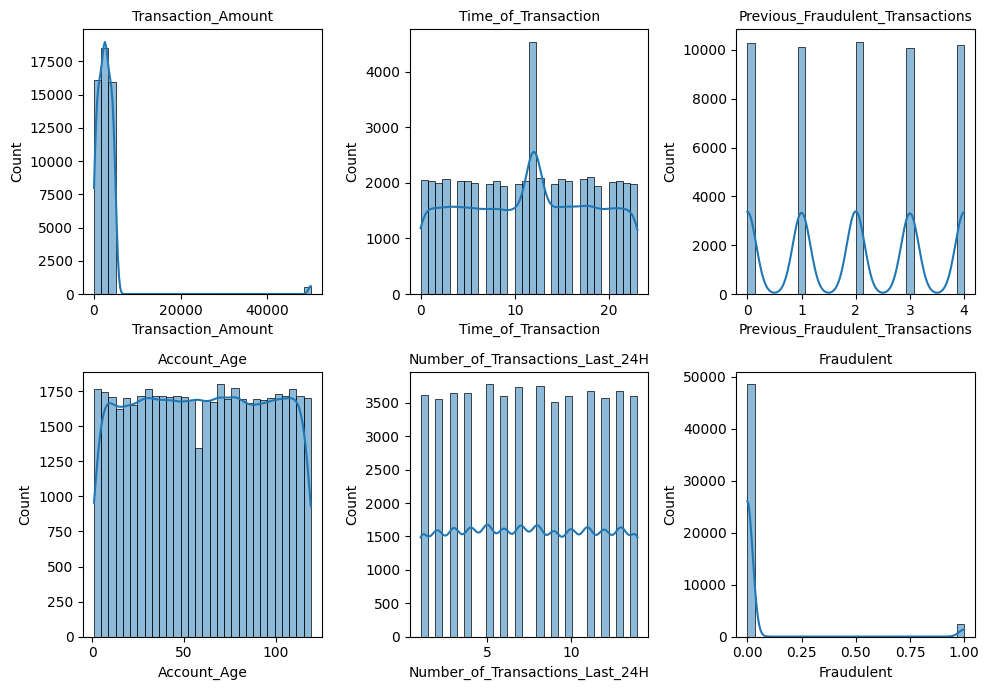

In [16]:
f, ax = plt.subplots(2,3, figsize=(10,7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 10)
    
plt.tight_layout()
plt.show()

### **Boxplot**

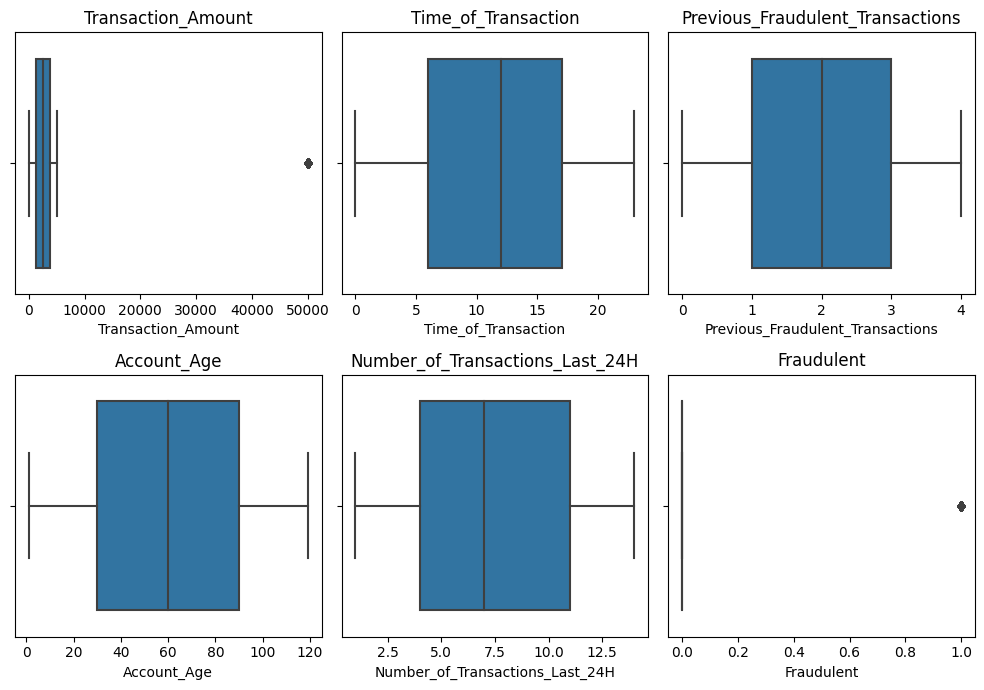

In [17]:
f, ax = plt.subplots(2,3, figsize=(10,7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

### **CountPlot**

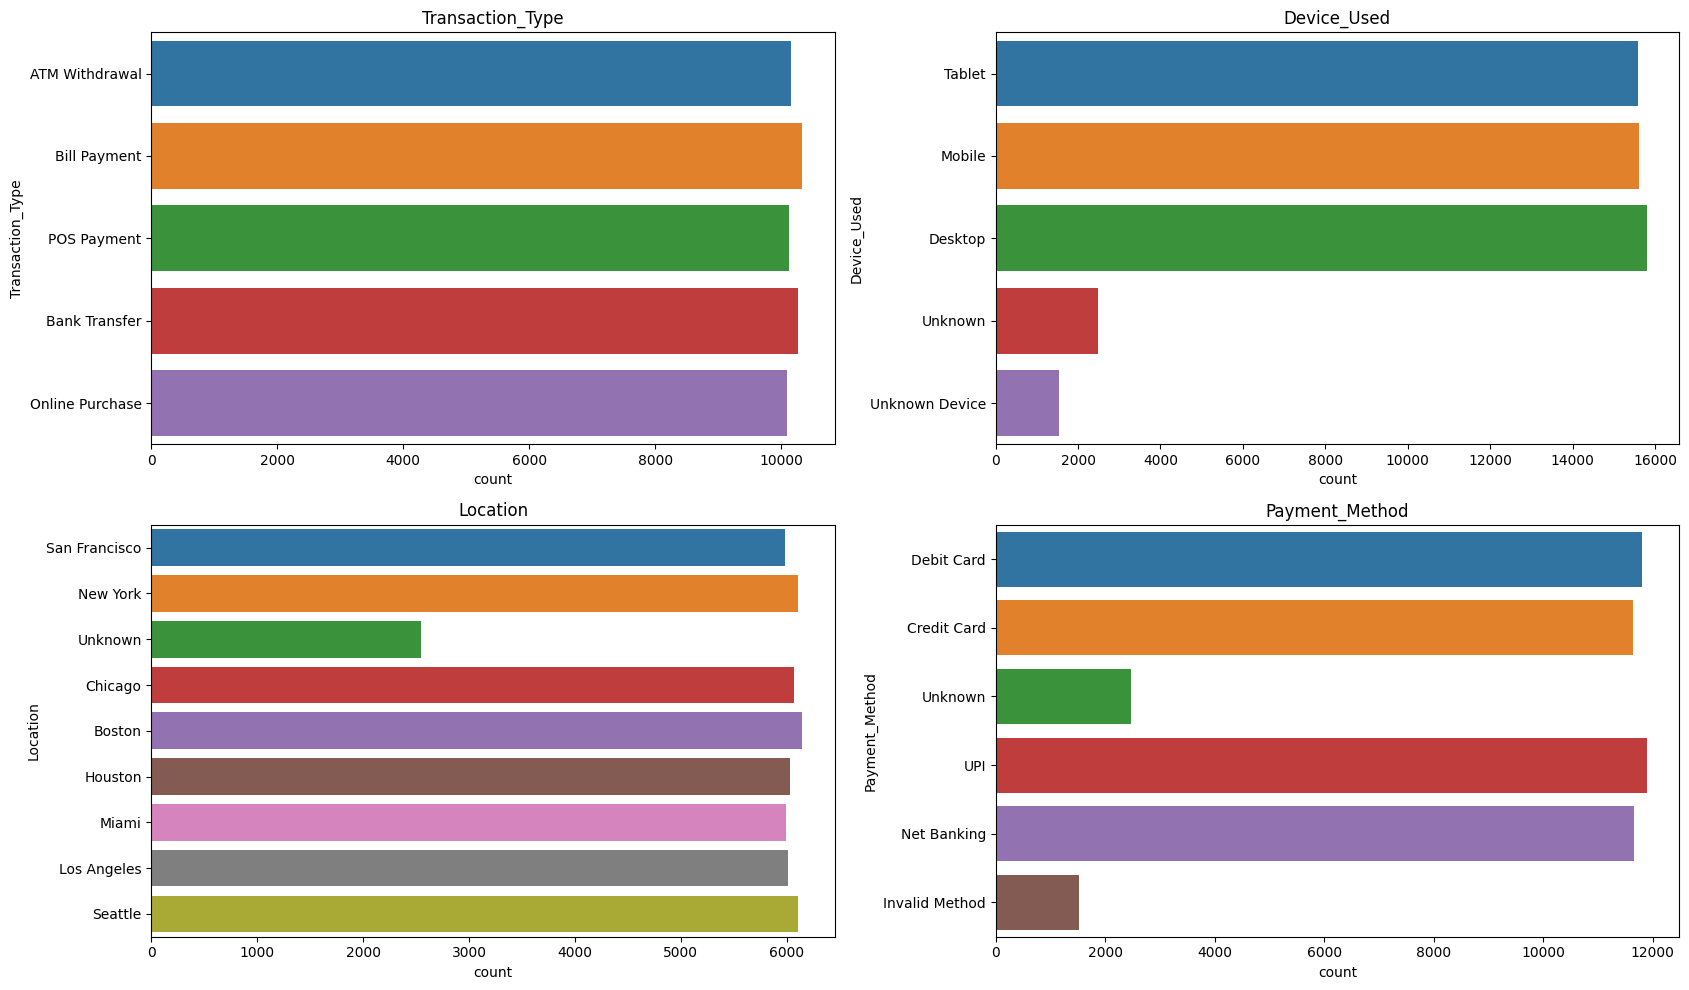

In [18]:
f, ax = plt.subplots(2,2 , figsize=(17,10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(df, y= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

## **Correlation**

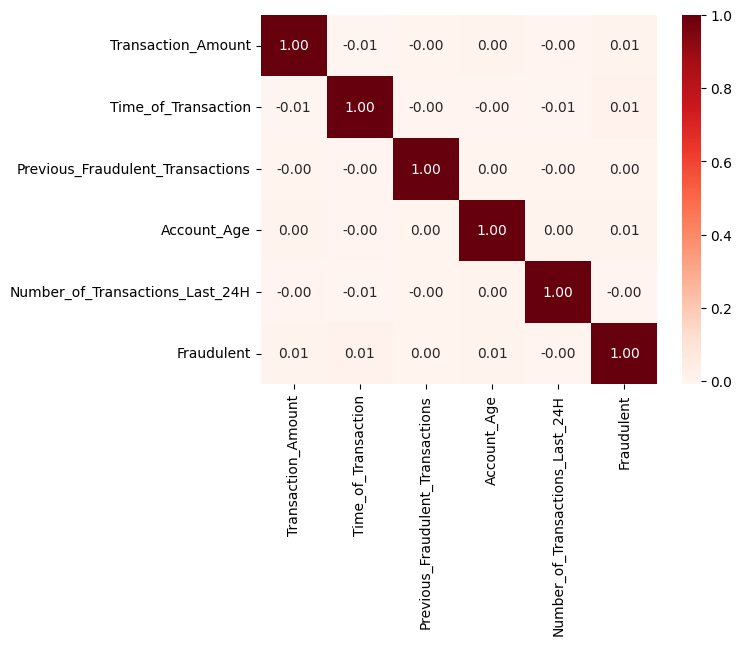

In [19]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_auc_score

## **Preprocessing**

In [21]:
df = df.drop(columns=['Transaction_ID', 'User_ID', 'Time_of_Transaction'])

In [22]:
#df['Fraudulent'] = df['Fraudulent'].astype(object)

### **LabelEncoder**

In [23]:
cat_cols = df.select_dtypes(include = ['object']).columns

In [24]:
label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label} -> {code}")
    print()

Column: Transaction_Type
ATM Withdrawal -> 0
Bank Transfer -> 1
Bill Payment -> 2
Online Purchase -> 3
POS Payment -> 4

Column: Device_Used
Desktop -> 0
Mobile -> 1
Tablet -> 2
Unknown -> 3
Unknown Device -> 4

Column: Location
Boston -> 0
Chicago -> 1
Houston -> 2
Los Angeles -> 3
Miami -> 4
New York -> 5
San Francisco -> 6
Seattle -> 7
Unknown -> 8

Column: Payment_Method
Credit Card -> 0
Debit Card -> 1
Invalid Method -> 2
Net Banking -> 3
UPI -> 4
Unknown -> 5



### **Train Test Split**

In [25]:
df = df.apply(pd.to_numeric, errors='coerce')

In [26]:
#df['Fraudulent'] = df['Fraudulent'].astype(object)

In [27]:
x = df.drop(columns=['Fraudulent']) 
y = df['Fraudulent'] 

In [28]:
x_train, x_test, y_train, y_test =train_test_split(x, y , random_state = 42, test_size= 0.2)

## **ML**

In [29]:
lgr = LogisticRegression()
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
dct = DecisionTreeClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [lgr, rfc, abc,dct, gbc, xgb]

names = ["LogisticRegression","Random Forest", "Ada Boost","DecisionTree",
        "Gradient Boostng", "XGBoost"]

LogisticRegression accuracy: 0.9498039215686275
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.00      0.00      0.00       512

    accuracy                           0.95     10200
   macro avg       0.47      0.50      0.49     10200
weighted avg       0.90      0.95      0.93     10200



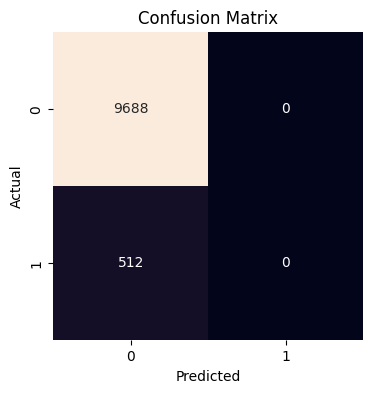

--------------------------------------------------
Random Forest accuracy: 0.9520588235294117
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9688
           1       1.00      0.04      0.09       512

    accuracy                           0.95     10200
   macro avg       0.98      0.52      0.53     10200
weighted avg       0.95      0.95      0.93     10200



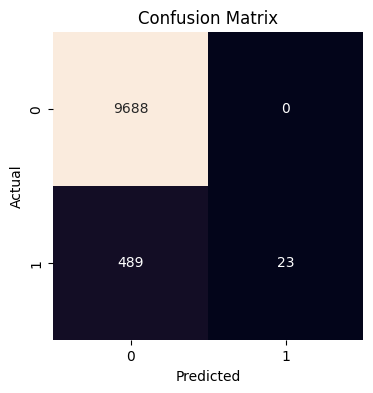

--------------------------------------------------
Ada Boost accuracy: 0.9497058823529412
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.00      0.00      0.00       512

    accuracy                           0.95     10200
   macro avg       0.47      0.50      0.49     10200
weighted avg       0.90      0.95      0.93     10200



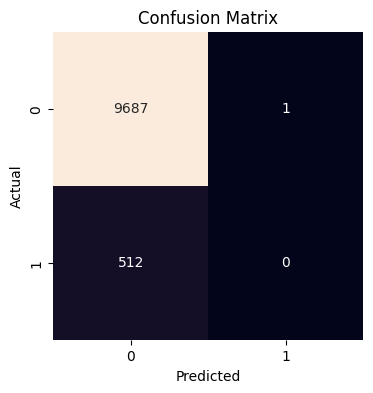

--------------------------------------------------
DecisionTree accuracy: 0.8957843137254902
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9688
           1       0.10      0.13      0.11       512

    accuracy                           0.90     10200
   macro avg       0.52      0.53      0.53     10200
weighted avg       0.91      0.90      0.90     10200



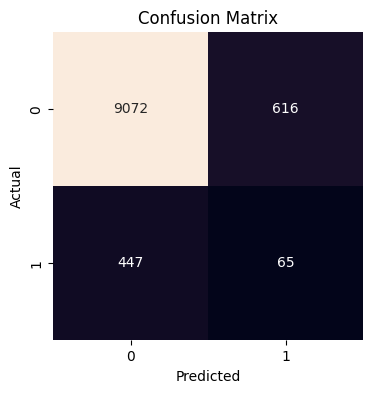

--------------------------------------------------
Gradient Boostng accuracy: 0.9497058823529412
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.00      0.00      0.00       512

    accuracy                           0.95     10200
   macro avg       0.47      0.50      0.49     10200
weighted avg       0.90      0.95      0.93     10200



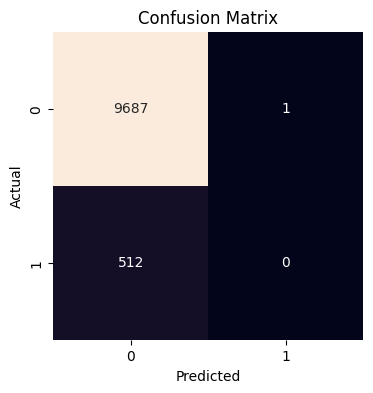

--------------------------------------------------
XGBoost accuracy: 0.9499019607843138
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9688
           1       0.60      0.01      0.01       512

    accuracy                           0.95     10200
   macro avg       0.78      0.50      0.49     10200
weighted avg       0.93      0.95      0.93     10200



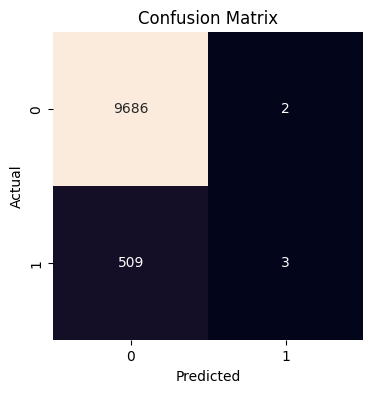

--------------------------------------------------


In [30]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    #pred = label_encoder.inverse_transform(pred)
    accuracy = accuracy_score(y_test, pred)
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    
    print(f'{names[index]} accuracy: {accuracy}')
    print(classification_report(y_test, pred))
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    index += 1

## **Model Comparison**

In [31]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,LogisticRegression,94.980392
1,Random Forest,95.205882
2,Ada Boost,94.970588
3,DecisionTree,89.578431
4,Gradient Boostng,94.970588
5,XGBoost,94.990196


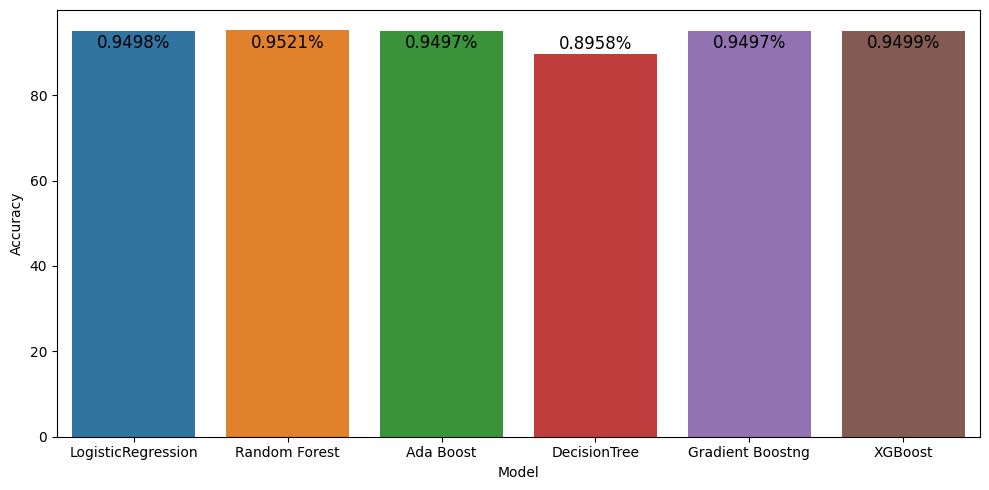

In [32]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')

for index, value in enumerate(ac):
    plt.text(index, value + 90, f"{value:.4f}%", ha='center', fontsize=12)
    
plt.tight_layout()
plt.show() 

* **The accuracy of all models is similar.**   
* **RandomFroest Model is Best Model**

## **Parameter Tuning**

In [33]:
n_estimators = [100, 200, 300]
max_depth = [None, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [34]:
tune = GridSearchCV(rfc, parameters, cv = 3, verbose=2,
                   scoring="accuracy")

In [35]:
tune

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [36]:
tune.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.5s
[CV] END m

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [37]:
best_params = tune.best_params_
best_score = tune.best_score_
print(f'Best parameters: {best_params}')
print(f'Best score: {abs(best_score)}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9515196078431373


In [38]:
best_model = tune.best_estimator_
pred_ = best_model.predict(x_test)

accuracy : 0.9521


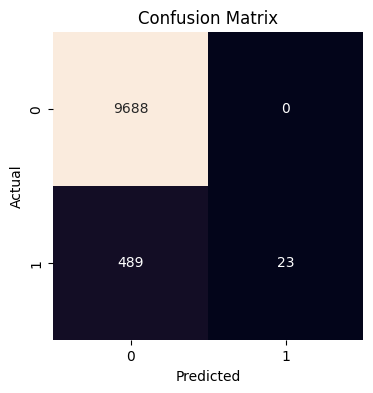

In [39]:
cm2 = confusion_matrix(y_test,pred_)
accuracy = accuracy_score(y_test, pred_)
print(f'accuracy : {round(accuracy,4)}')

plt.figure(figsize=(4, 4))
sns.heatmap(cm2, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**The Tuning results show little difference in accuracy.**

## **Feature Importance**

In [40]:
#Select RF model

sorted_idx = (-rfc.feature_importances_).argsort()
list_of_tuples = list(zip(x.columns[sorted_idx],
                           rfc.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','feature importance'])
feat_importance

,feature,feature importance
0,Transaction_Amount,0.292859
1,Account_Age,0.229625
2,Number_of_Transactions_Last_24H,0.121821
3,Location,0.094806
4,Payment_Method,0.073724
5,Previous_Fraudulent_Transactions,0.067736
6,Transaction_Type,0.067161
7,Device_Used,0.052268


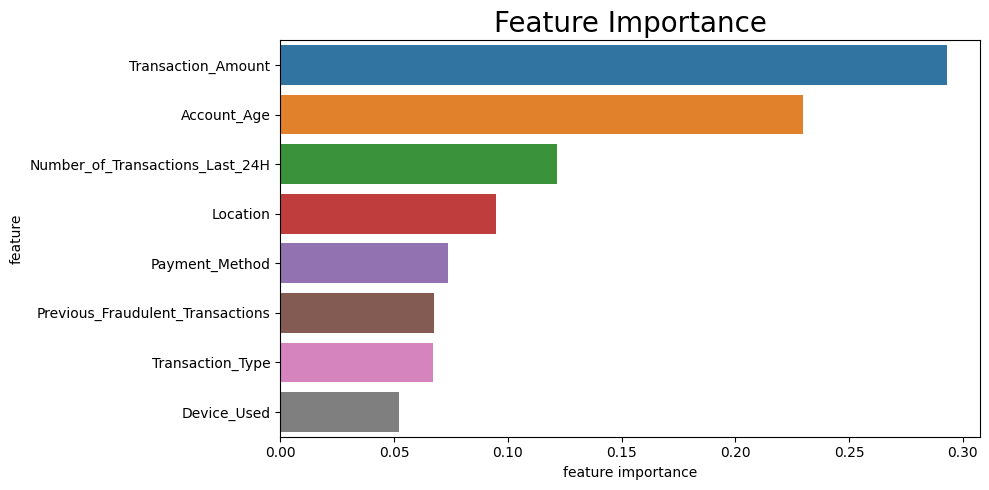

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(feat_importance,y= 'feature',x='feature importance')

plt.title('Feature Importance',fontsize=20)
plt.tight_layout()
plt.show()

----------------------
**Thankyou. Please leave your advice in the comments.**